# Credit Risk 2018 by MiBanco

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel')

In [2]:
df = pd.read_csv('credit_risk_en.csv')
df.head()

,district,commercial_activity,housing_type,sex,age,civil_condition,number_of_children,disbursed_amount,loan_term,guarantor,type_of_warranty,max_days_delay,qualification_system,num_banks,risk_segmentation
0,AHUAC,DEPENDENT,OWN,FEMALE,38,COHABITANT,2,2012.87,12,NO,PROPERTY,0,NORMAL,2,2
1,HUAMANCACA CHICO,DEPENDENT,OWN,MALE,39,COHABITANT,1,45865.30,48,NO,PROPERTY,0,NORMAL,2,3
2,CHUPACA,FAMILY TRADE,FEMALE,FEMALE,42,SINGLE,1,1007.44,12,NO,FURNITURE,0,NORMAL,1,2
3,CHUPACA,DEPENDENT,FAMILIAR,FEMALE,22,SINGLE,0,2012.87,12,YES,PROPERTY,1,NORMAL,1,3
4,CHUPACA,TRADE,OWN,FEMALE,35,COHABITANT,2,1509.71,12,NO,PROPERTY,3,NORMAL,1,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district              207 non-null    object 
 1   commercial_activity   207 non-null    object 
 2   housing_type          207 non-null    object 
 3   sex                   207 non-null    object 
 4   age                   207 non-null    int64  
 5   civil_condition       207 non-null    object 
 6   number_of_children    207 non-null    int64  
 7   disbursed_amount      207 non-null    float64
 8   loan_term             207 non-null    int64  
 9   guarantor             207 non-null    object 
 10  type_of_warranty      207 non-null    object 
 11  max_days_delay        207 non-null    int64  
 12  qualification_system  207 non-null    object 
 13  num_banks             207 non-null    int64  
 14  risk_segmentation     207 non-null    int64  
dtypes: float64(1), int64(6)

In [46]:
df.describe()

,age,number_of_children,disbursed_amount,loan_term,max_days_delay,num_banks,risk_segmentation
count,207.000000,207.000000,2.070000e+02,207.000000,207.000000,207.000000,207.000000
mean,41.082126,1.748792,1.880466e+04,16.043478,5.304348,1.792271,2.415459
std,10.972075,1.224620,8.295253e+04,8.883990,12.420197,0.892438,1.075478
min,22.000000,0.000000,3.008800e+02,3.000000,0.000000,1.000000,1.000000
25%,34.500000,1.000000,1.509710e+03,12.000000,0.000000,1.000000,2.000000
50%,39.000000,2.000000,3.019310e+03,12.000000,1.000000,2.000000,2.000000
75%,48.000000,3.000000,1.003010e+04,18.000000,4.000000,2.000000,3.000000
max,68.000000,5.000000,1.137732e+06,48.000000,87.000000,4.000000,5.000000


In [39]:
df['loan_term'].unique()

array([12, 48, 24, 18,  3, 10, 15, 36,  6,  9,  8])

In [44]:
num_cols = ['age', 'disbursed_amount', 'max_days_delay']

## Numeric Continuos

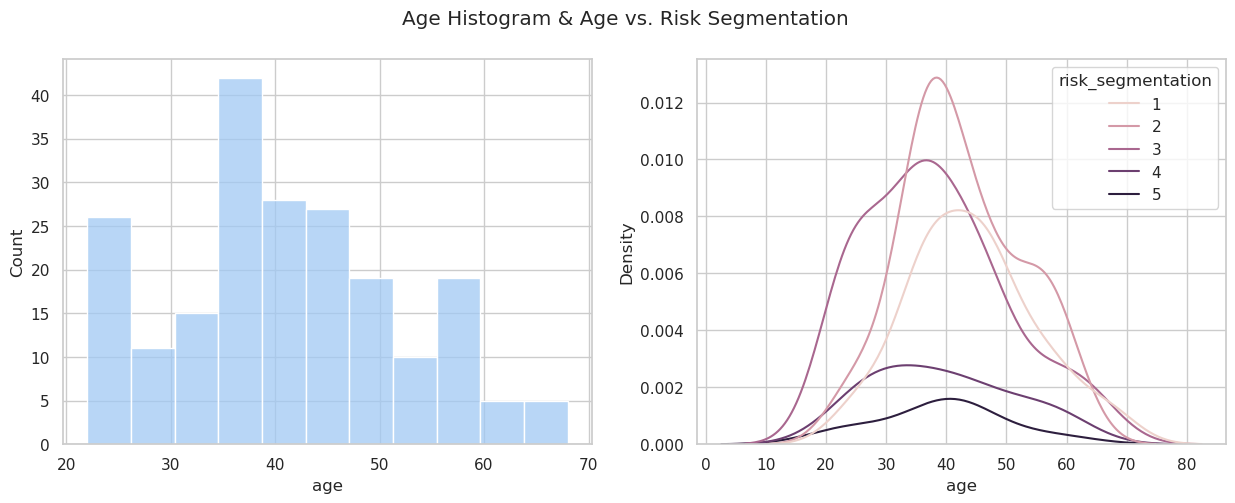

In [57]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(df['age'], ax=axs.flat[0]);
sns.kdeplot(data=df, x='age', hue='risk_segmentation', ax=axs.flat[1]);
plt.suptitle('Age Histogram & Age vs. Risk Segmentation');

- Los 2 gráficos indica que en el rango de 25 a 60 años se encuentra el grueso de personas de la muestra.
- En la comparación con el target **risk_segmentation** se muestra que en el mismo rango se encuentran los clientes con mayor riesgo.

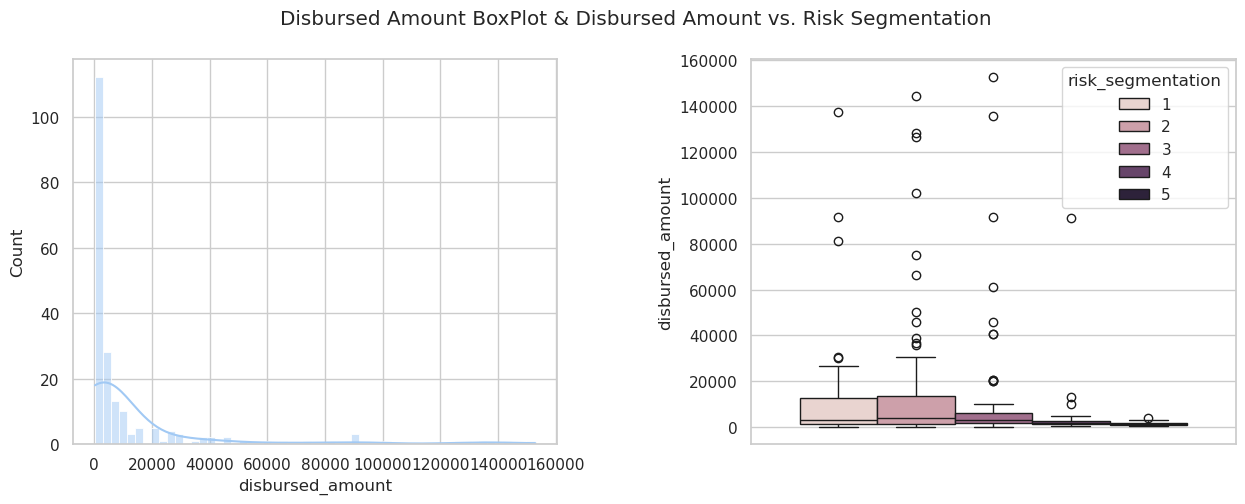

In [178]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
plt.subplots_adjust(wspace=0.4)

df_trim = df[df['disbursed_amount'] < 1e6]

sns.histplot(df_trim['disbursed_amount'], ax=axs.flat[0], kde=True);
sns.boxplot(data=df_trim, y='disbursed_amount', hue='risk_segmentation', ax=axs.flat[1]);
plt.suptitle('Disbursed Amount BoxPlot & Disbursed Amount vs. Risk Segmentation');

- El boxplot nos muestra que gran parte del monto depositado al cliente por el banco se encuentra por debajo de los 20,000 soles.
- Las personas que recibieron un depósito mas alto tienden a tener riesgo 2.
- Se puede observar que las personas con riesgo más alto no solicitaron montos mayores de 20,000.
  

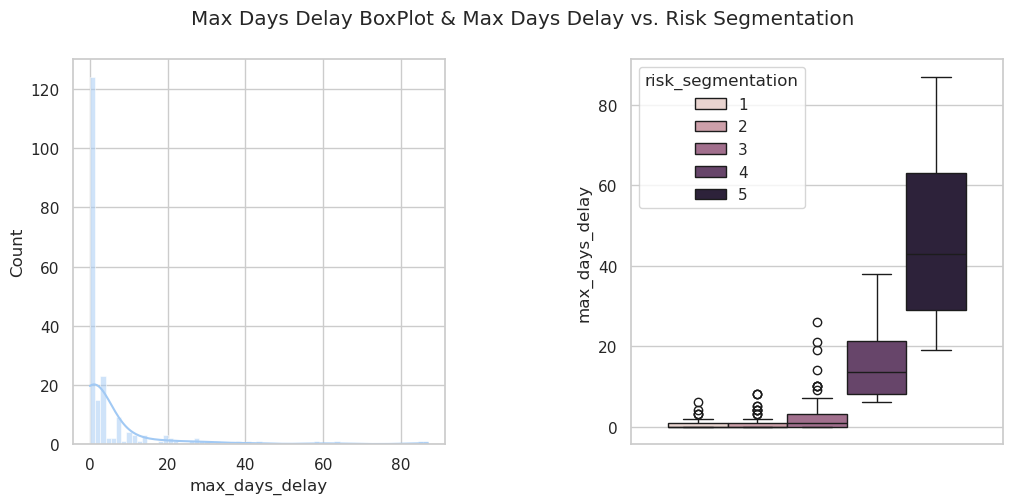

In [180]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 5))
plt.subplots_adjust(wspace=0.5)
sns.histplot(df['max_days_delay'], ax=axs.flat[0], kde=True);
sns.boxplot(data=df, y='max_days_delay', hue='risk_segmentation', ax=axs.flat[1]);
plt.suptitle('Max Days Delay BoxPlot & Max Days Delay vs. Risk Segmentation');

- El boxplot nos indica que la media de días de delay están entre 0 y 5.
- Con respecto al risk_segmentation, se ve que correlación positiva donde mientras más días pase, el riesgo aumenta.
- Esta correlación positiva vuelve al `max_days_delay` un buen predictor.

## Categorical

In [137]:
pd.crosstab(df['district'], df['risk_segmentation'], margins=True, margins_name='Total')

risk_segmentation,1,2,3,4,5,Total
district,,,,,,
AHUAC,6,6,4,2,1,19
CHAMBARA,2,1,2,0,1,6
CHILCA,1,0,0,0,0,1
CHONGOS,3,2,3,0,0,8
CHUPACA,22,27,26,8,4,87
CHUPURO,1,1,0,0,0,2
EL TAMBO,0,4,6,0,0,10
HUACHAC,0,2,1,2,1,6
HUAMANCACA CHICO,1,7,6,1,0,15


- Se puede observar que el distrito **Chupaca** tiene 42% del total de observaciones, por lo que se puede tratar de un distrito crítico para la revisión de riesgos.
- No se muestra una uniformidad en el riesgo por distrito, algunos tienen mayor concentración en 1 y 2, mientras otros en el 3 y 4.
- Existen distritos solo con una observación, por lo que pueden ser distritos que se **descarten** en el análisis por no aportar mayor información.
- Muy pocas personas se encuentran en la categoría 5, demostrando que el criterio para evaluar a una persona en esa categoría es estricto.

In [142]:
pd.crosstab(df['commercial_activity'], df['risk_segmentation'], margins=True, margins_name='Total')

risk_segmentation,1,2,3,4,5,Total
commercial_activity,,,,,,
DEPENDENT,3,10,11,2,1,27
FAMILY DEPENDENT,1,4,4,3,1,13
FAMILY PRODUCTION,0,0,1,0,1,2
FAMILY SERVICE,4,8,15,5,3,35
FAMILY TRADE,2,2,7,1,0,12
PRODUCTION,1,7,1,0,0,9
SERVICE,18,21,12,5,2,58
TRADE,18,13,15,4,1,51
Total,47,65,66,20,9,207


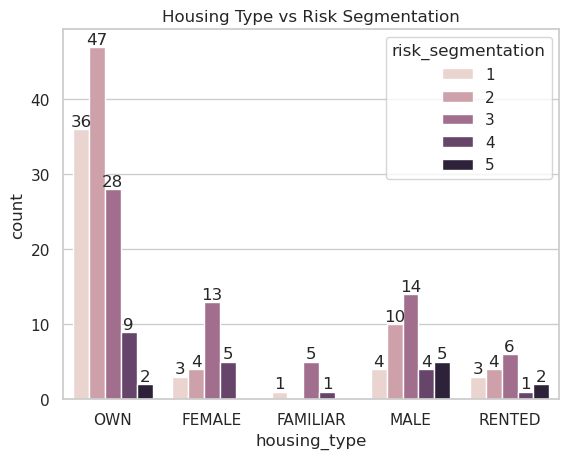

In [148]:
ax = sns.countplot(df, x='housing_type', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])

plt.title('Housing Type vs Risk Segmentation');

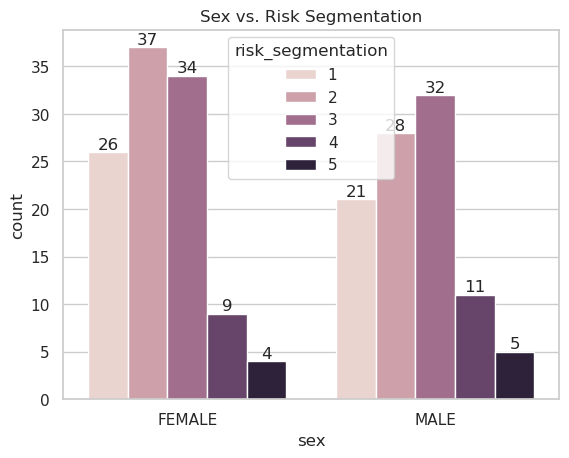

In [158]:
ax = sns.countplot(df, x='sex', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Sex vs. Risk Segmentation');

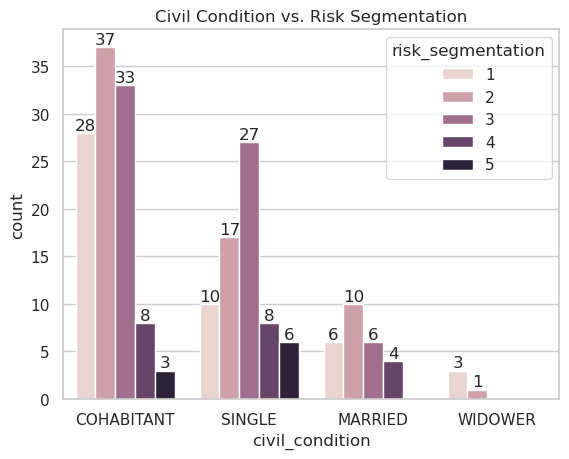

In [162]:
ax = sns.countplot(df, x='civil_condition', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Civil Condition vs. Risk Segmentation');

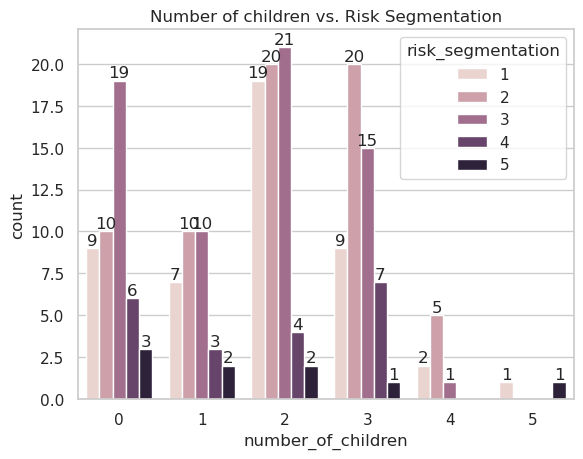

In [163]:
ax = sns.countplot(df, x='number_of_children', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Number of children vs. Risk Segmentation');

In [166]:
pd.crosstab(df['loan_term'], df['risk_segmentation'], margins=True, margins_name='Total')

risk_segmentation,1,2,3,4,5,Total
loan_term,,,,,,
3,1,1,2,0,0,4
6,3,5,2,1,1,12
8,0,1,0,0,0,1
9,0,1,0,0,0,1
10,2,1,6,3,1,13
12,24,30,31,11,6,102
15,0,0,1,1,0,2
18,9,9,14,1,1,34
24,4,6,3,2,0,15


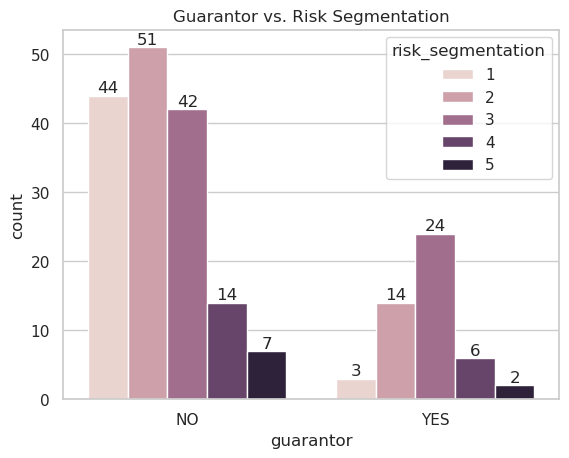

In [172]:
ax = sns.countplot(df, x='guarantor', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Guarantor vs. Risk Segmentation');

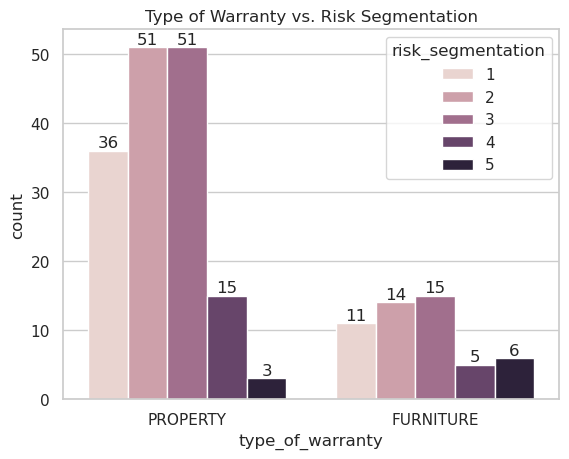

In [173]:
ax = sns.countplot(df, x='type_of_warranty', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Type of Warranty vs. Risk Segmentation');

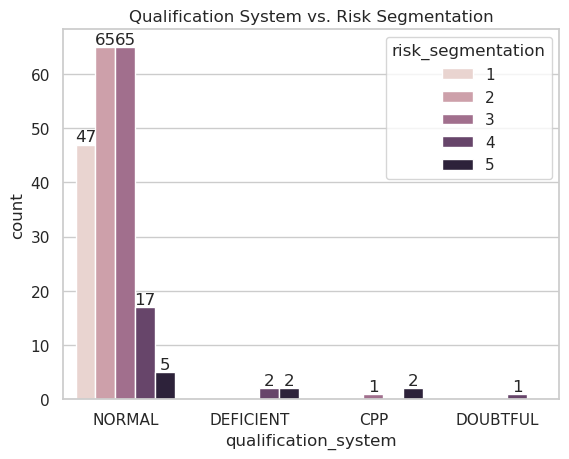

In [174]:
ax = sns.countplot(df, x='qualification_system', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Qualification System vs. Risk Segmentation');

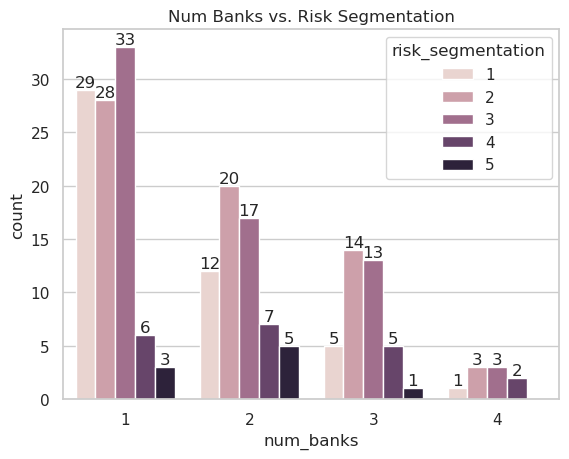

In [175]:
ax = sns.countplot(df, x='num_banks', hue='risk_segmentation');
for i in range(5):
    ax.bar_label(ax.containers[i])
plt.title('Num Banks vs. Risk Segmentation');